In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("./parquet/run0024_srppac.parquet").select("id_x","timing_x","charge_x","id_y","timing_y","charge_y")
df.show(10)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/13 14:14:03 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/13 14:14:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/13 14:14:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/13 14:14:04 WARN RapidsPluginUtils: RAPIDS Accelerator 25.10.0 using cudf 25.10.0, private revision 28e7c65b3c0526baba384d9b97ee12e4d6766d9a
26/01/13 14:14:04 WARN RapidsPluginUtils: RAPIDS Accelerator is enabled, to disable GPU support set `spark.rapids.sql.enabled` to false.


+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                id_x|            timing_x|            charge_x|                id_y|            timing_y|            charge_y|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|[31, 0, 4, 3, 5, ...|[402.864525553683...|[83.0264675751968...|[0, 2, 3, 4, 5, 1...|[396.609331153609...|[59.3618733820621...|
|[31, 0, 3, 4, 5, ...|[402.570956944080...|[82.121599340986,...|[0, 2, 3, 4, 31, ...|[396.510402370215...|[58.4939994036685...|
|[31, 0, 3, 5, 30,...|[403.289357593108...|[82.4068165428179...|[0, 3, 2, 4, 8, 3...|[396.338604118092...|[59.2794036321283...|
|[31, 0, 30, 3, 4,...|[403.238038584997...|[82.6341282091452...|[0, 3, 2, 4, 5, 1...|[396.018840157310...|[58.6587850737851...|
|[31, 0, 4, 30, 3,...|[402.785773062263...|[82.0962471357779...|[0, 3, 2, 4, 5, 1...|[395.927298762020..

Statistics:
[[   0.    0.    0.]
 [   0. 4735.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 4795.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 4735.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 4795.    0.]
 [   0.    0.    0.]]


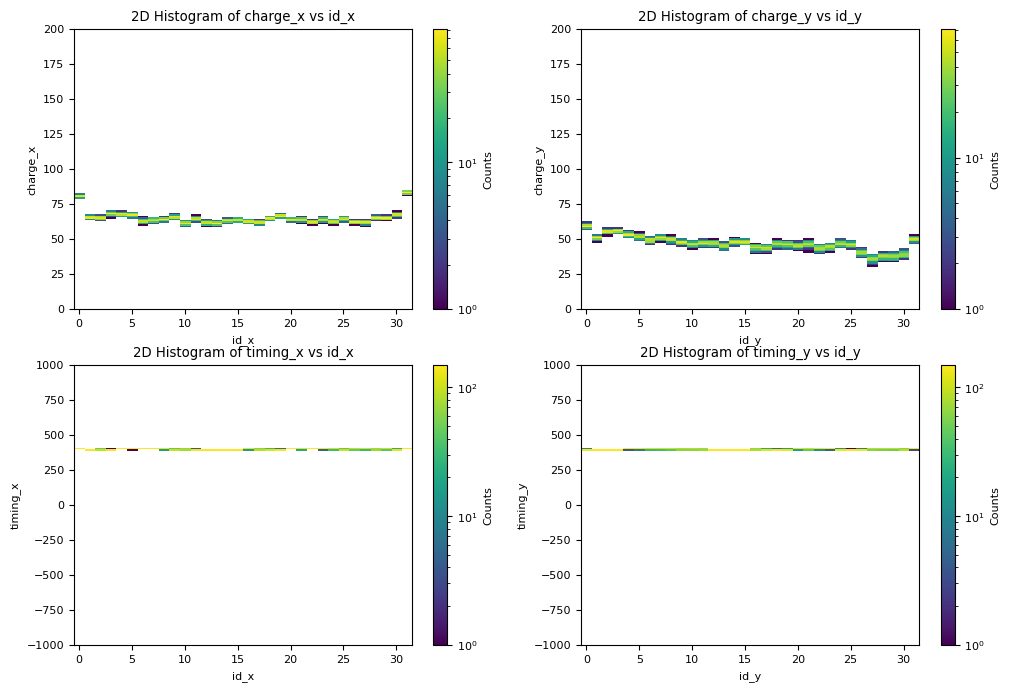

In [2]:
from hist.sparkHist2d import Hist2DArrays
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,8))
plt.rcParams["font.size"] = 8
plt.subplot2grid((2,2),(0,0))
h = Hist2DArrays(df, ["id_x","charge_x"], [33,200], [[-0.5, 31.5], [0, 200]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(0,1))
h = Hist2DArrays(df, ["id_y","charge_y"], [33,200], [[-0.5, 31.5], [0, 200]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,0))
h = Hist2DArrays(df, ["id_x","timing_x"], [33,200], [[-0.5, 31.5], [-1000, 1000]], norm=LogNorm(), interpolation='none')
plt.subplot2grid((2,2),(1,1))
h = Hist2DArrays(df, ["id_y","timing_y"], [33,200], [[-0.5, 31.5], [-1000, 1000]], norm=LogNorm(), interpolation='none')
plt.show()